In [9]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

In [11]:
# Load your dataset into a pandas DataFrame
Data= pd.read_csv("/content/drive/MyDrive/Dataset_HD.csv")
Data = Data.drop(columns=['id', 'dataset'])

In [12]:
null_counts = Data.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage = (null_counts / len(Data)) * 100

# Combine the counts and percentages into a DataFrame for better visualization
null_values_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentage
})

# Display the result
print(null_values_info)


          Null Count  Null Percentage (%)
age                0             0.000000
sex                0             0.000000
cp                 0             0.000000
trestbps          59             6.413043
chol              30             3.260870
fbs               90             9.782609
restecg            2             0.217391
thalch            55             5.978261
exang             55             5.978261
oldpeak           62             6.739130
slope            309            33.586957
ca               611            66.413043
thal             486            52.826087
num                0             0.000000


In [13]:
# Define a threshold for dropping columns
threshold = 25.0

# Drop columns with excessive missing values
Data = Data.drop(columns=null_values_info[null_values_info['Null Percentage (%)'] > threshold].index)

In [14]:
null_counts = Data.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage = (null_counts / len(Data)) * 100

# Combine the counts and percentages into a DataFrame for better visualization
null_values_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentage
})

# Display the result
print(null_values_info)

          Null Count  Null Percentage (%)
age                0             0.000000
sex                0             0.000000
cp                 0             0.000000
trestbps          59             6.413043
chol              30             3.260870
fbs               90             9.782609
restecg            2             0.217391
thalch            55             5.978261
exang             55             5.978261
oldpeak           62             6.739130
num                0             0.000000


In [15]:
# Impute remaining numerical columns with the mean
for col in Data.select_dtypes(include=['float64', 'int64']).columns:
    Data[col] = Data[col].fillna(Data[col].mean())

null_counts = Data.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage = (null_counts / len(Data)) * 100

# Combine the counts and percentages into a DataFrame for better visualization
null_values_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentage
})

# Display the result
print(null_values_info)

# Get the number of rows and columns
Row, Col = Data.shape

# Print the number of rows and columns
print(f"Number of rows: {Row}")
print(f"Number of columns: {Col}")

          Null Count  Null Percentage (%)
age                0             0.000000
sex                0             0.000000
cp                 0             0.000000
trestbps           0             0.000000
chol               0             0.000000
fbs               90             9.782609
restecg            2             0.217391
thalch             0             0.000000
exang             55             5.978261
oldpeak            0             0.000000
num                0             0.000000
Number of rows: 920
Number of columns: 11


In [18]:
# Drop rows with missing values in any remaining columns
Data = Data.dropna()

# Get the number of rows and columns
Row, Col = Data.shape

# Print the number of rows and columns
print(f"Number of rows: {Row}")
print(f"Number of columns: {Col}")


Number of rows: 774
Number of columns: 11


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoders = {}
for column in Data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    Data[column] = label_encoders[column].fit_transform(Data[column])

print(Data.head(10))

   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  num
0   63    1   3     145.0  233.0    1        0   150.0      0      2.3    0
1   67    1   0     160.0  286.0    0        0   108.0      1      1.5    2
2   67    1   0     120.0  229.0    0        0   129.0      1      2.6    1
3   37    1   2     130.0  250.0    0        1   187.0      0      3.5    0
4   41    0   1     130.0  204.0    0        0   172.0      0      1.4    0
5   56    1   1     120.0  236.0    0        1   178.0      0      0.8    0
6   62    0   0     140.0  268.0    0        0   160.0      0      3.6    3
7   57    0   0     120.0  354.0    0        1   163.0      1      0.6    0
8   63    1   0     130.0  254.0    0        0   147.0      0      1.4    2
9   53    1   0     140.0  203.0    1        0   155.0      1      3.1    1


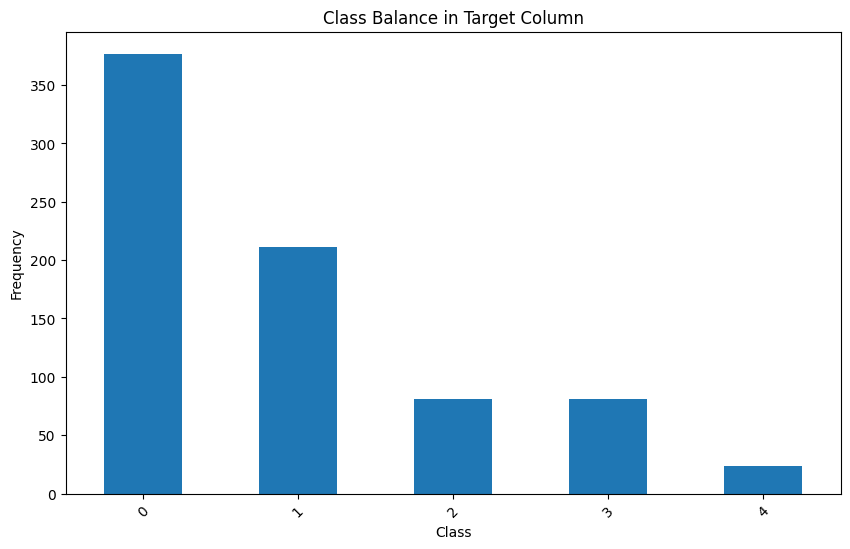

In [20]:
import matplotlib.pyplot as plt

class_counts = Data['num'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Balance in Target Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


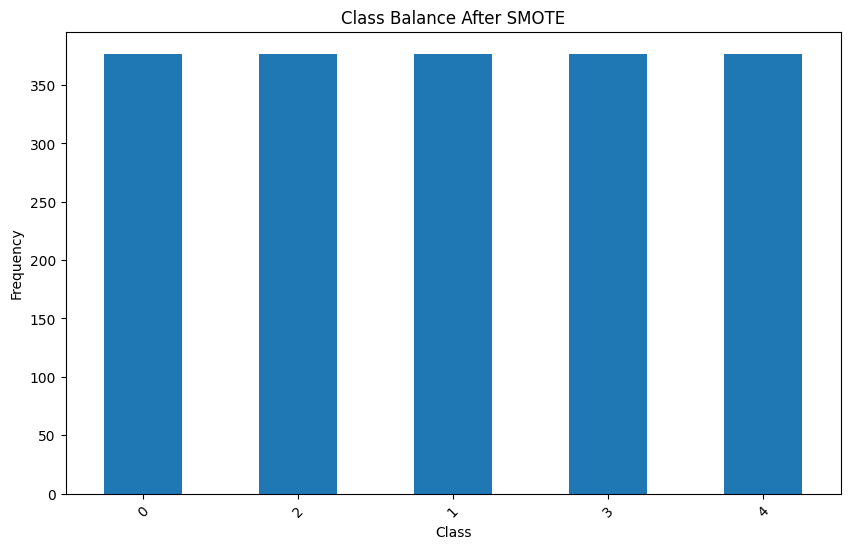

In [21]:
from imblearn.over_sampling import SMOTE

X = Data.drop('num', axis=1)  # Features
y = Data['num']  # Target column

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
Data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
Data_resampled['num'] = y_resampled

# Visualize the new class distribution
new_class_counts = Data_resampled['num'].value_counts()

plt.figure(figsize=(10, 6))
new_class_counts.plot(kind='bar')
plt.title('Class Balance After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Create a new DataFrame with the resampled data
Data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
Data_resampled['num'] = y_resampled

# Update the original Data DataFrame
Data = Data_resampled

# Transform the 'num' column to only have 0 and 1
Data['num'] = Data['num'].apply(lambda x: 1 if x > 0 else 0)
print(Data.head (10))

# Get the number of rows and columns
Row, Col = Data.shape

# Print the number of rows and columns
print(f"Number of rows: {Row}")
print(f"Number of columns: {Col}")

   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  num
0   63    1   3     145.0  233.0    1        0   150.0      0      2.3    0
1   67    1   0     160.0  286.0    0        0   108.0      1      1.5    1
2   67    1   0     120.0  229.0    0        0   129.0      1      2.6    1
3   37    1   2     130.0  250.0    0        1   187.0      0      3.5    0
4   41    0   1     130.0  204.0    0        0   172.0      0      1.4    0
5   56    1   1     120.0  236.0    0        1   178.0      0      0.8    0
6   62    0   0     140.0  268.0    0        0   160.0      0      3.6    1
7   57    0   0     120.0  354.0    0        1   163.0      1      0.6    0
8   63    1   0     130.0  254.0    0        0   147.0      0      1.4    1
9   53    1   0     140.0  203.0    1        0   155.0      1      3.1    1
Number of rows: 1885
Number of columns: 11


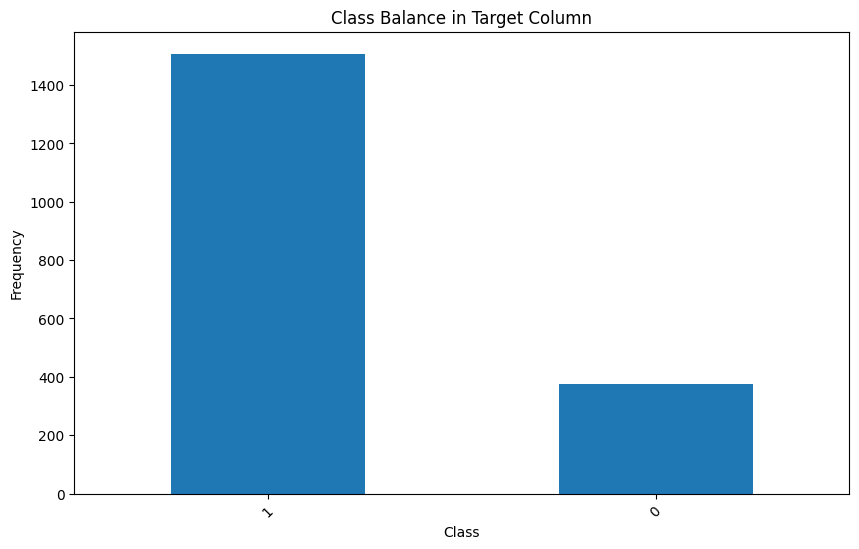

In [23]:
import matplotlib.pyplot as plt

class_counts = Data['num'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Balance in Target Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


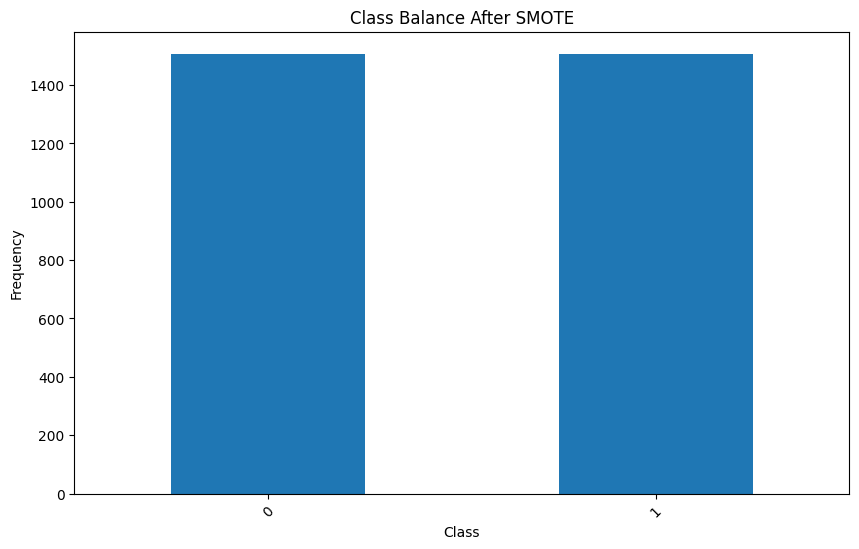

In [24]:
from imblearn.over_sampling import SMOTE

X = Data.drop('num', axis=1)  # Features
y = Data['num']  # Target column

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
Data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
Data_resampled['num'] = y_resampled

# Visualize the new class distribution
new_class_counts = Data_resampled['num'].value_counts()

plt.figure(figsize=(10, 6))
new_class_counts.plot(kind='bar')
plt.title('Class Balance After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Create a new DataFrame with the resampled data
Data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
Data_resampled['num'] = y_resampled

# Update the original Data DataFrame
Data = Data_resampled

# Transform the 'num' column to only have 0 and 1
Data['num'] = Data['num'].apply(lambda x: 1 if x > 0 else 0)
print(Data.head (10))

# Get the number of rows and columns
Row, Col = Data.shape

# Print the number of rows and columns
print(f"Number of rows: {Row}")
print(f"Number of columns: {Col}")

   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  num
0   63    1   3     145.0  233.0    1        0   150.0      0      2.3    0
1   67    1   0     160.0  286.0    0        0   108.0      1      1.5    1
2   67    1   0     120.0  229.0    0        0   129.0      1      2.6    1
3   37    1   2     130.0  250.0    0        1   187.0      0      3.5    0
4   41    0   1     130.0  204.0    0        0   172.0      0      1.4    0
5   56    1   1     120.0  236.0    0        1   178.0      0      0.8    0
6   62    0   0     140.0  268.0    0        0   160.0      0      3.6    1
7   57    0   0     120.0  354.0    0        1   163.0      1      0.6    0
8   63    1   0     130.0  254.0    0        0   147.0      0      1.4    1
9   53    1   0     140.0  203.0    1        0   155.0      1      3.1    1
Number of rows: 3016
Number of columns: 11


In [26]:
# Print the column names
print(Data.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'num']


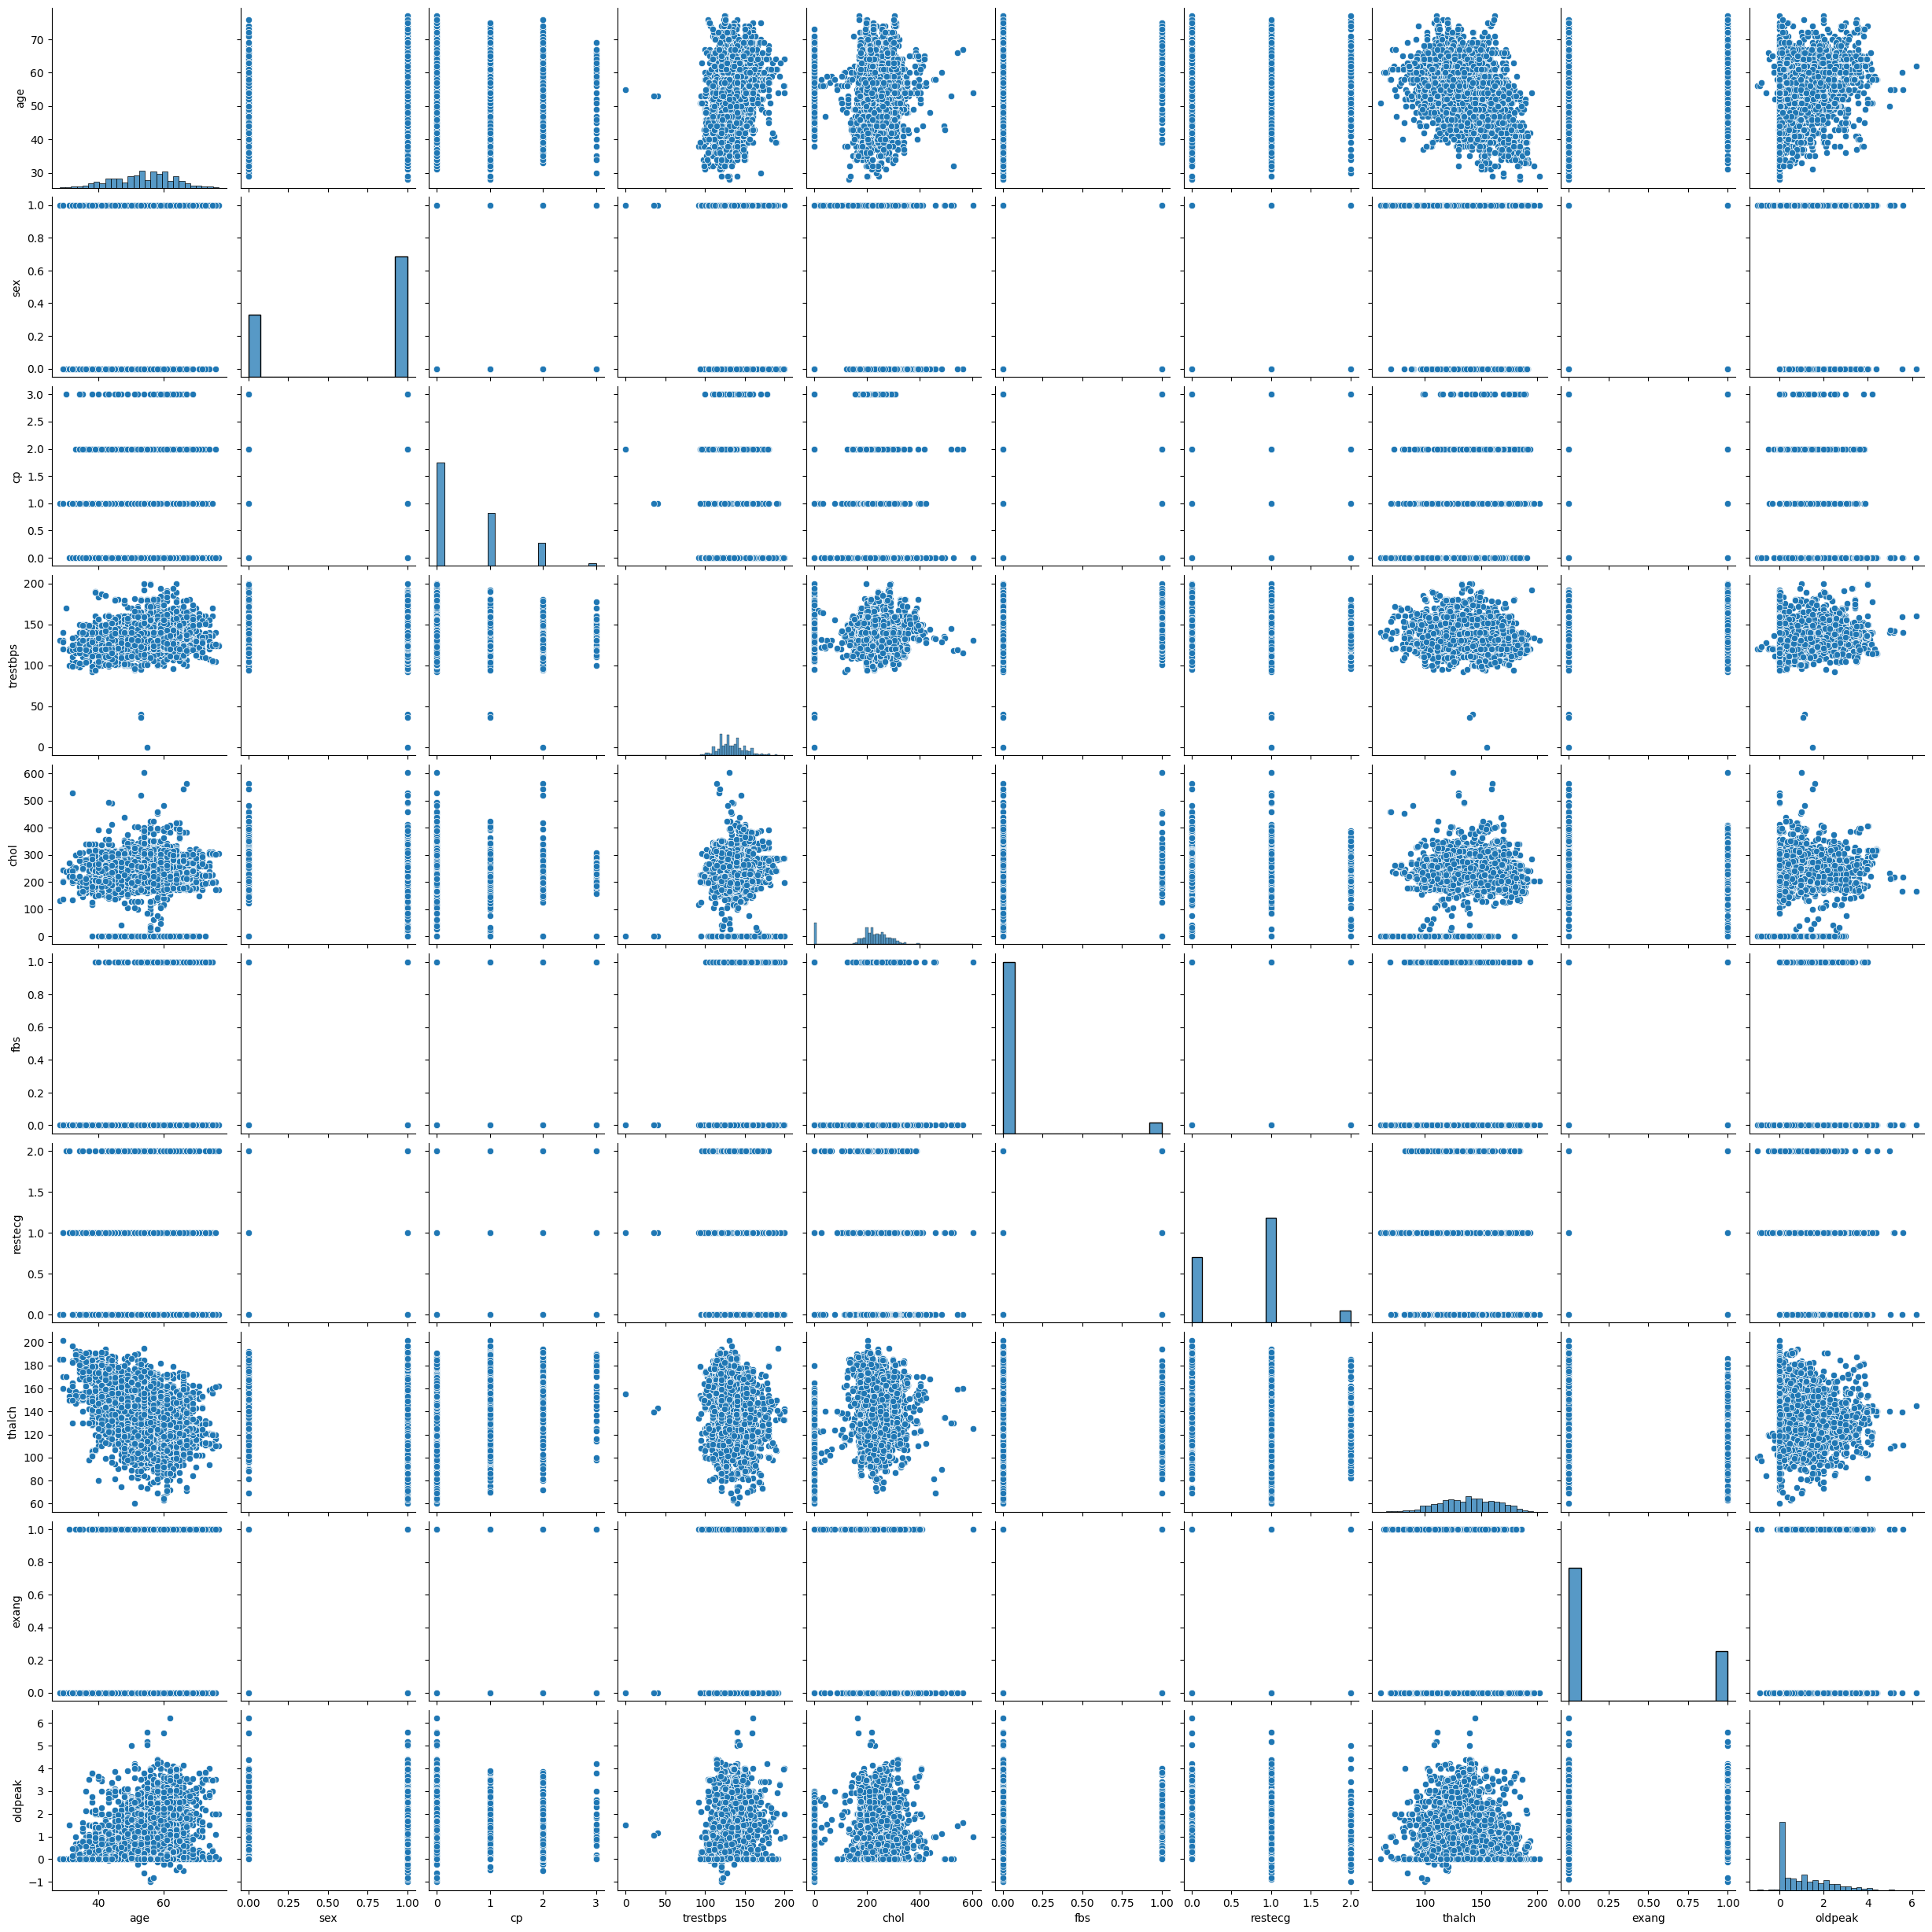

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the numeric column from the DataFrame
df_non_numeric = Data.drop(columns=['num'])

# Generate scatter plots
sns.pairplot(df_non_numeric)
plt.show()

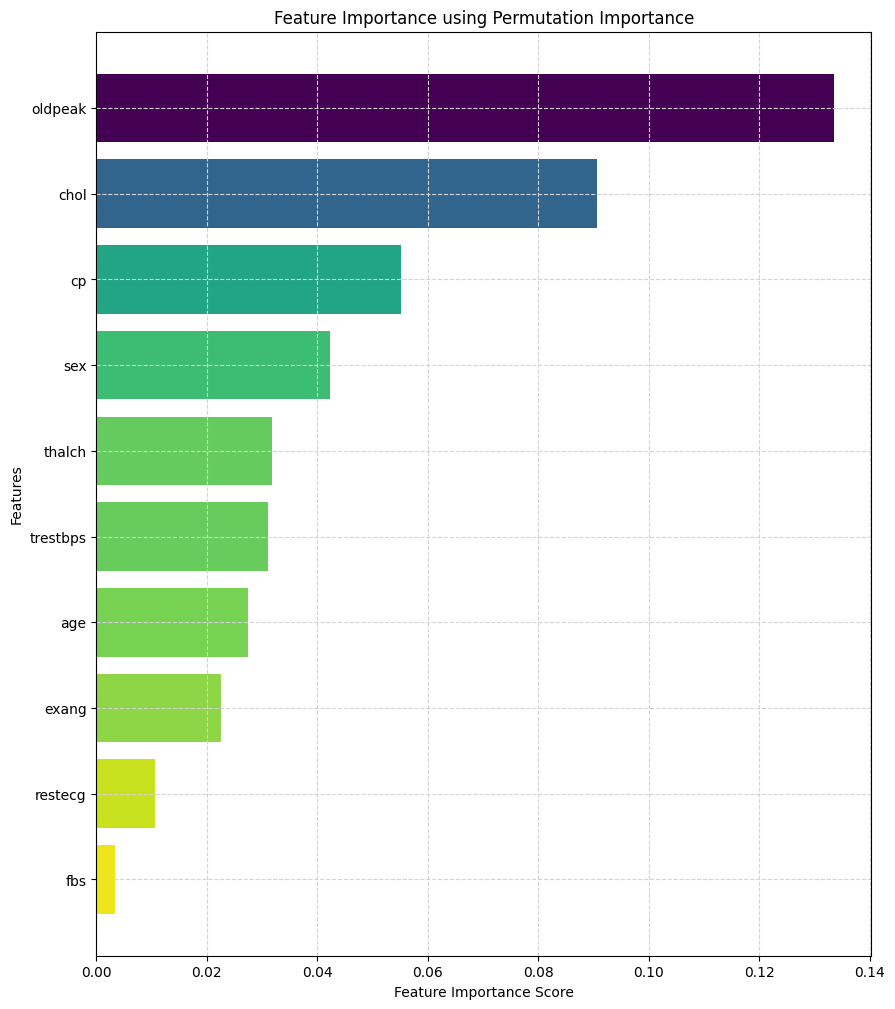

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
data = Data
# Splitting data into features (X) and target (y)
X = data.drop("num", axis=1)
y = data["num"]

from sklearn.inspection import permutation_importance

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier for training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Compute permutation feature importance
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Display all features according to their importance with different colors
colors = plt.cm.viridis_r(perm_importance.importances_mean[sorted_idx] / max(perm_importance.importances_mean))  # Use viridis colormap for colors
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], color=colors)
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Permutation Importance')
plt.grid(True, color='lightgray', linestyle='--')
plt.show()

In [29]:
# Select the top k features based on feature importances
k = 10
selected_features = X.columns[sorted_idx][-k:]


Ridge Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.855     0.910     0.882       311
           1      0.897     0.836     0.866       293

    accuracy                          0.874       604
   macro avg      0.876     0.873     0.874       604
weighted avg      0.876     0.874     0.874       604

Mean Cross-validation Score (Ridge): 0.8770
Confusion Matrix:
[[283  28]
 [ 48 245]]
True Positives: 245
True Negatives: 283
False Positives: 28
False Negatives: 48
Training Time: 0.0401 seconds
Testing Time: 0.0151 seconds


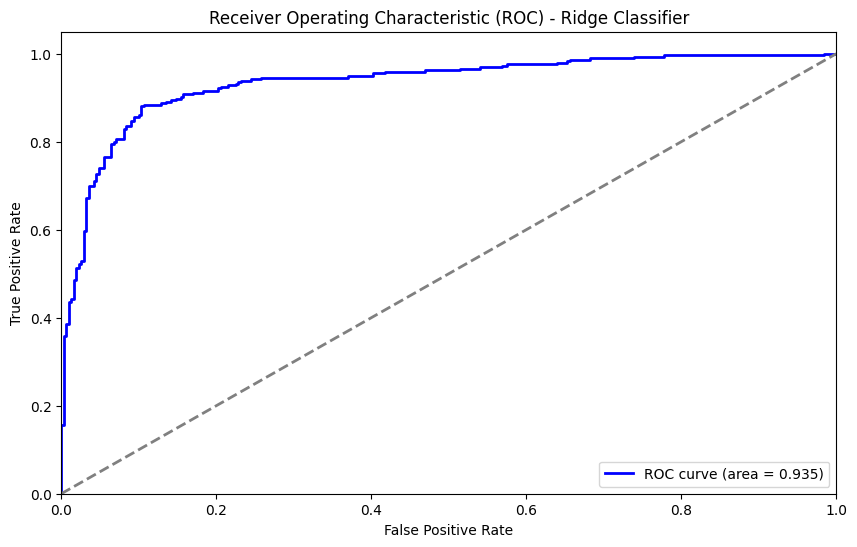

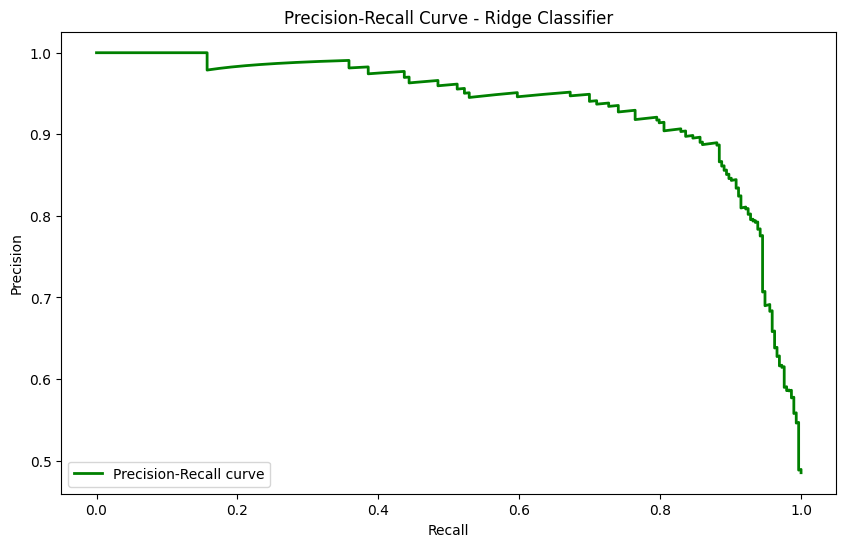

In [33]:
import time
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Record start time
start_time = time.time()

# Train and evaluate the Ridge Classifier with selected features using k-fold cross-validation
ridge = RidgeClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
ridge.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_ridge = ridge.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Ridge Classifier
cv_scores_ridge = cross_val_score(ridge, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_ridge = np.mean(cv_scores_ridge)

# Print classification report for the Ridge Classifier with selected features
print("Ridge Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_ridge, digits=3))
print("Mean Cross-validation Score (Ridge): {:.4f}".format(mean_cv_score_ridge))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ridge)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curve (required for ROC curve)
y_proba_ridge = ridge.decision_function(X_test_selected)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_ridge)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Ridge Classifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_ridge)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Ridge Classifier')
plt.legend(loc="lower left")
plt.show()


Random Forest Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.923     0.929     0.926       311
           1      0.924     0.918     0.921       293

    accuracy                          0.924       604
   macro avg      0.924     0.924     0.924       604
weighted avg      0.924     0.924     0.924       604

Mean Cross-validation Score (Random Forest): 0.9301
Confusion Matrix:
[[289  22]
 [ 24 269]]
True Positives: 269
True Negatives: 289
False Positives: 22
False Negatives: 24
Training Time: 18.8176 seconds
Testing Time: 0.3043 seconds


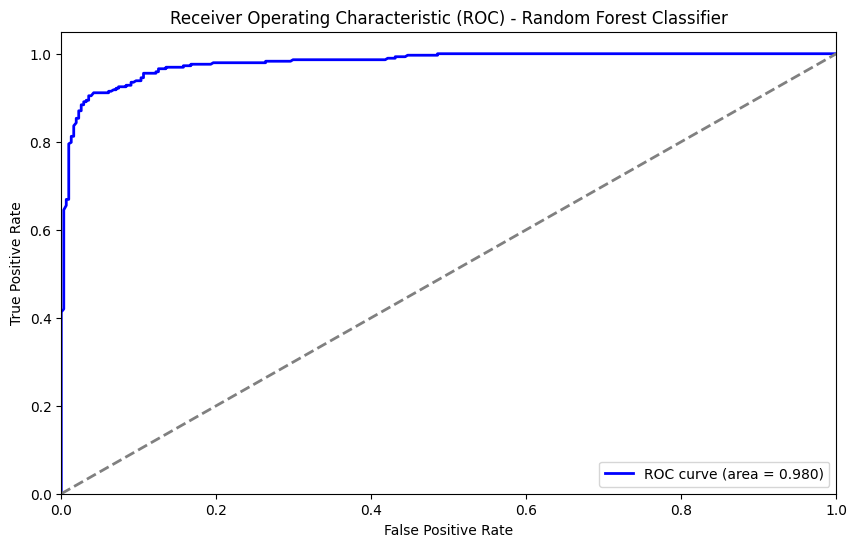

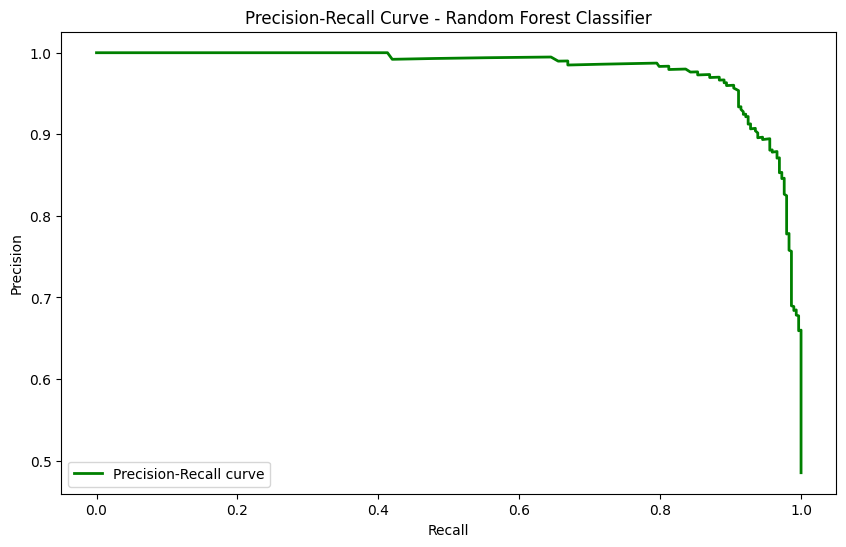

In [34]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the Random Forest classifier with selected features using k-fold cross-validation
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
                            max_samples=None)

# Record training start time
training_start_time = time.time()
rf.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_rf = rf.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_rf = np.mean(cv_scores_rf)

# Print classification report for the Random Forest classifier with selected features
print("Random Forest Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_rf, digits=3))
print("Mean Cross-validation Score (Random Forest): {:.4f}".format(mean_cv_score_rf))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curve (required for ROC curve)
y_proba_rf = rf.predict_proba(X_test_selected)[:, 1]  # Probability for the positive class (1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Classifier')
plt.legend(loc="lower left")
plt.show()


Decision Tree Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.909     0.926     0.917       311
           1      0.920     0.901     0.910       293

    accuracy                          0.914       604
   macro avg      0.914     0.914     0.914       604
weighted avg      0.914     0.914     0.914       604

Mean Cross-validation Score (Decision Tree): 0.8969
Confusion Matrix:
[[288  23]
 [ 29 264]]
True Positives: 264
True Negatives: 288
False Positives: 23
False Negatives: 29
Training Time: 0.0718 seconds
Testing Time: 0.0081 seconds


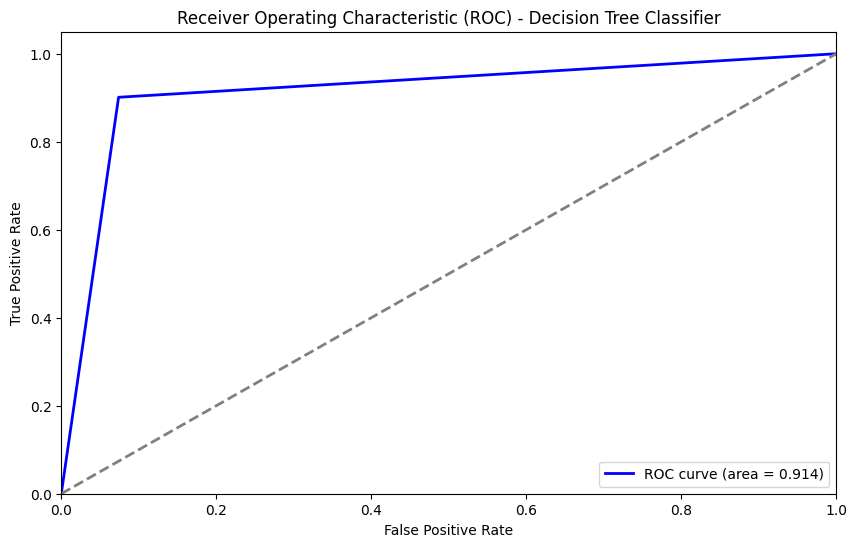

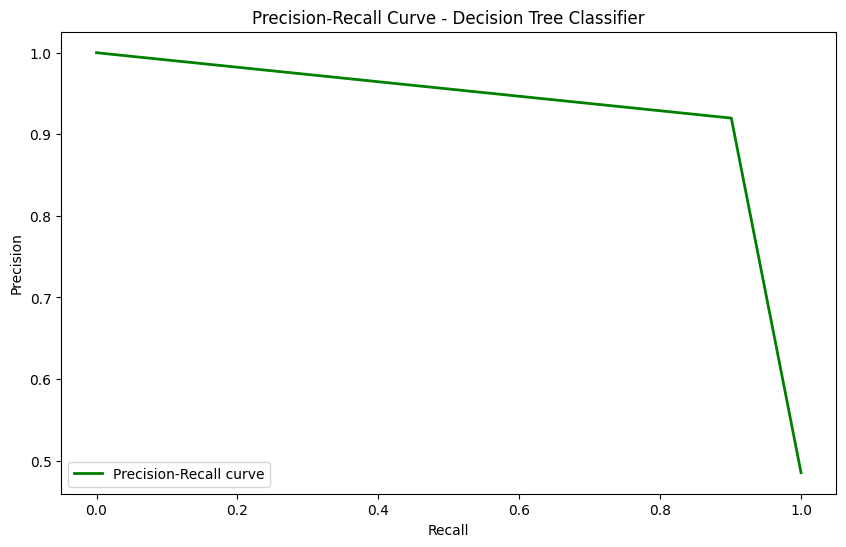

In [35]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Select the top k features based on feature importances
k = 10 # Number of top features to select
selected_features = X.columns[sorted_idx][-k:]

# Train and evaluate the Decision Tree classifier with selected features using k-fold cross-validation
dt = DecisionTreeClassifier()

# Record training start time
training_start_time = time.time()
dt.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_dt = dt.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Decision Tree
cv_scores_dt = cross_val_score(dt, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_dt = np.mean(cv_scores_dt)

# Print classification report for the Decision Tree classifier with selected features
print("Decision Tree Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_dt, digits=3))
print("Mean Cross-validation Score (Decision Tree): {:.4f}".format(mean_cv_score_dt))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curve (required for ROC curve)
y_proba_dt = dt.predict_proba(X_test_selected)[:, 1]  # Probability for the positive class (1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_dt)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree Classifier')
plt.legend(loc="lower left")
plt.show()


KNeighborsClassifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.821     0.913     0.865       311
           1      0.895     0.788     0.838       293

    accuracy                          0.853       604
   macro avg      0.858     0.851     0.852       604
weighted avg      0.857     0.853     0.852       604

Mean Cross-validation Score (KNeighbors): 0.8515
Confusion Matrix:
[[284  27]
 [ 62 231]]
True Positives: 231
True Negatives: 284
False Positives: 27
False Negatives: 62
Training Time: 0.0359 seconds
Testing Time: 0.1260 seconds


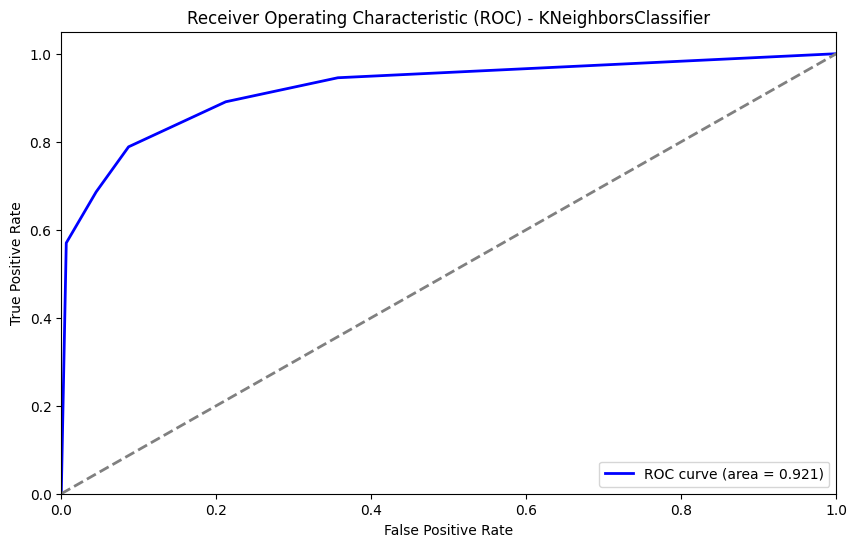

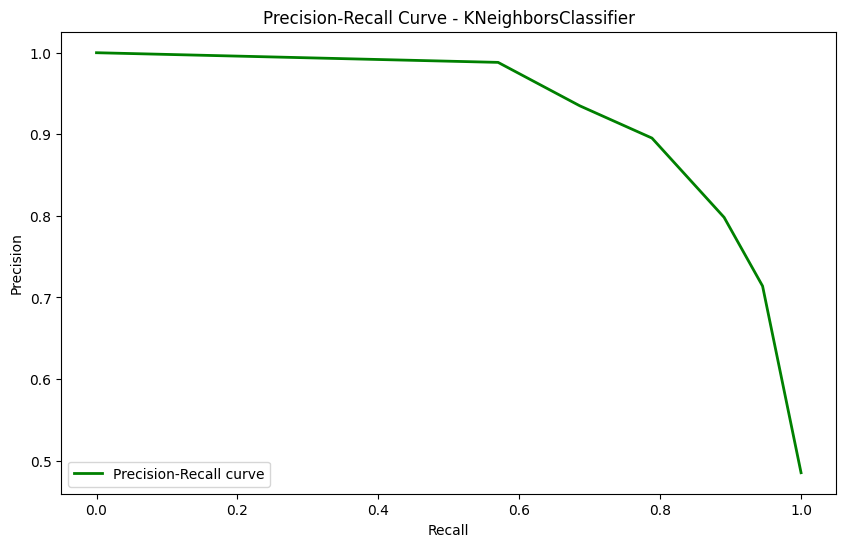

In [36]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the KNeighborsClassifier using k-fold cross-validation
knn = KNeighborsClassifier()

# Record training start time
training_start_time = time.time()
knn.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_knn = knn.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for KNeighborsClassifier
cv_scores_knn = cross_val_score(knn, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_knn = np.mean(cv_scores_knn)

# Print classification report for the KNeighborsClassifier
print("KNeighborsClassifier with Selected Features Report:")
print(classification_report(y_test, y_pred_knn, digits=3))
print("Mean Cross-validation Score (KNeighbors): {:.4f}".format(mean_cv_score_knn))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curve (required for ROC curve)
y_proba_knn = knn.predict_proba(X_test_selected)[:, 1]  # Probability for the positive class (1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_knn)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNeighborsClassifier')
plt.legend(loc="lower left")
plt.show()


Gaussian Naive Bayes Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.857     0.884     0.870       311
           1      0.873     0.843     0.858       293

    accuracy                          0.864       604
   macro avg      0.865     0.864     0.864       604
weighted avg      0.865     0.864     0.864       604

Mean Cross-validation Score (Gaussian Naive Bayes): 0.8647
Confusion Matrix:
[[275  36]
 [ 46 247]]
True Positives: 247
True Negatives: 275
False Positives: 36
False Negatives: 46
Training Time: 0.0473 seconds
Testing Time: 0.0067 seconds


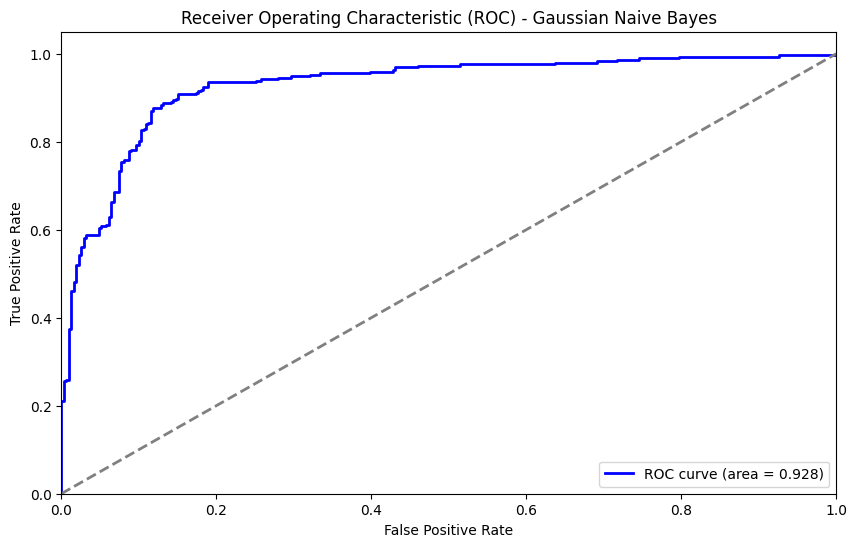

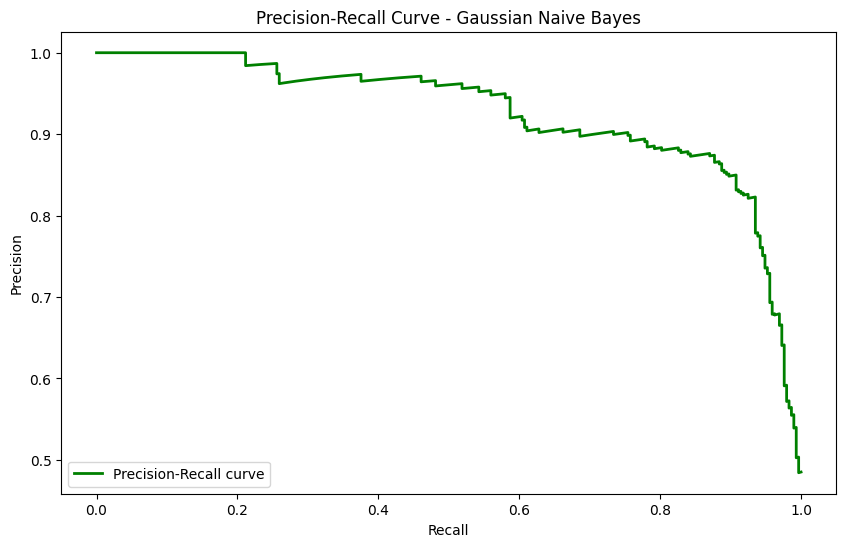

In [37]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the Gaussian Naive Bayes classifier with selected features using k-fold cross-validation
gnb = GaussianNB()

# Record training start time
training_start_time = time.time()
gnb.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_gnb = gnb.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Gaussian Naive Bayes
cv_scores_gnb = cross_val_score(gnb, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_gnb = np.mean(cv_scores_gnb)

# Print classification report for the Gaussian Naive Bayes classifier with selected features
print("Gaussian Naive Bayes Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_gnb, digits=3))
print("Mean Cross-validation Score (Gaussian Naive Bayes): {:.4f}".format(mean_cv_score_gnb))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curve (required for ROC curve)
y_proba_gnb = gnb.predict_proba(X_test_selected)[:, 1]  # Probability for the positive class (1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_gnb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_gnb)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gaussian Naive Bayes')
plt.legend(loc="lower left")
plt.show()


SGDClassifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.854     0.846     0.850       311
           1      0.838     0.846     0.842       293

    accuracy                          0.846       604
   macro avg      0.846     0.846     0.846       604
weighted avg      0.846     0.846     0.846       604

Mean Cross-validation Score (SGDClassifier): 0.6698
Confusion Matrix:
[[263  48]
 [ 45 248]]
True Positives: 248
True Negatives: 263
False Positives: 48
False Negatives: 45
Training Time: 0.0432 seconds
Testing Time: 0.0108 seconds


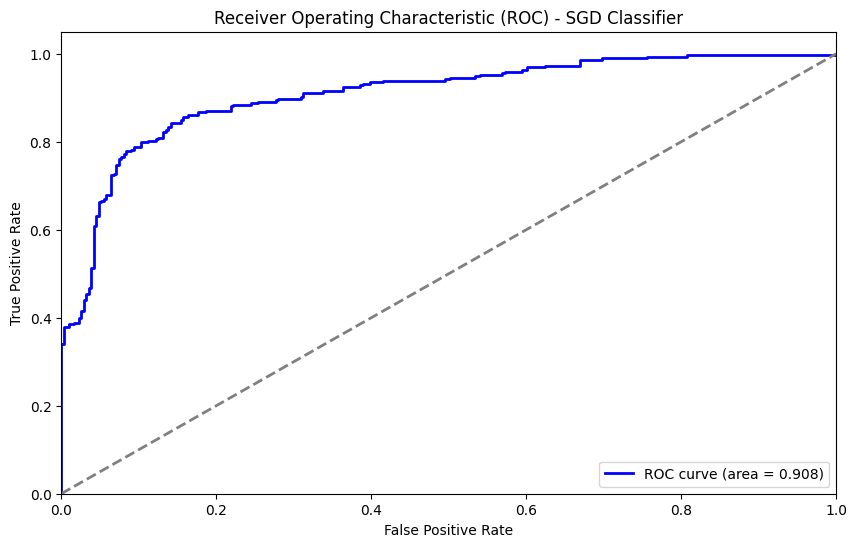

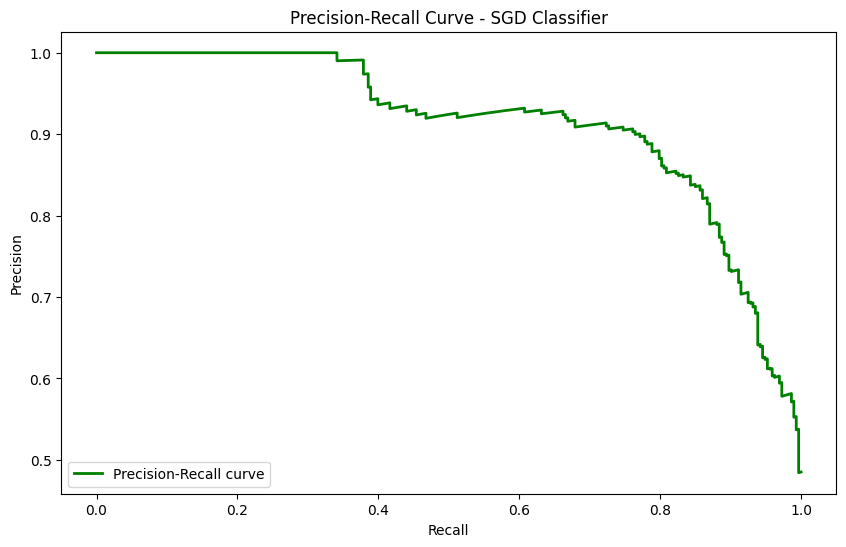

In [38]:
import time
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the SGDClassifier with selected features using k-fold cross-validation
sgd_clf = SGDClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
sgd_clf.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_sgd = sgd_clf.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for SGDClassifier
cv_scores_sgd = cross_val_score(sgd_clf, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_sgd = np.mean(cv_scores_sgd)

# Print classification report for the SGDClassifier with selected features
print("SGDClassifier with Selected Features Report:")
print(classification_report(y_test, y_pred_sgd, digits=3))
print("Mean Cross-validation Score (SGDClassifier): {:.4f}".format(mean_cv_score_sgd))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_sgd)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute decision function for ROC and precision-recall curve (since SGDClassifier doesn't have predict_proba)
y_scores_sgd = sgd_clf.decision_function(X_test_selected)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_sgd)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SGD Classifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_sgd)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SGD Classifier')
plt.legend(loc="lower left")
plt.show()


Extra Trees Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.922     0.949     0.935       311
           1      0.944     0.915     0.929       293

    accuracy                          0.932       604
   macro avg      0.933     0.932     0.932       604
weighted avg      0.932     0.932     0.932       604

Mean Cross-validation Score (Extra Trees): 0.9231
Confusion Matrix:
[[295  16]
 [ 25 268]]
True Positives: 268
True Negatives: 295
False Positives: 16
False Negatives: 25
Training Time: 0.4947 seconds
Testing Time: 0.0447 seconds


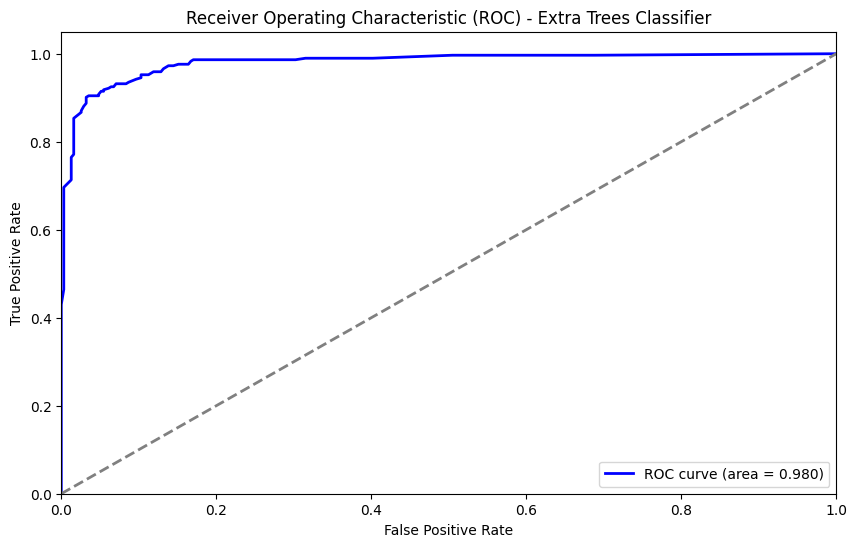

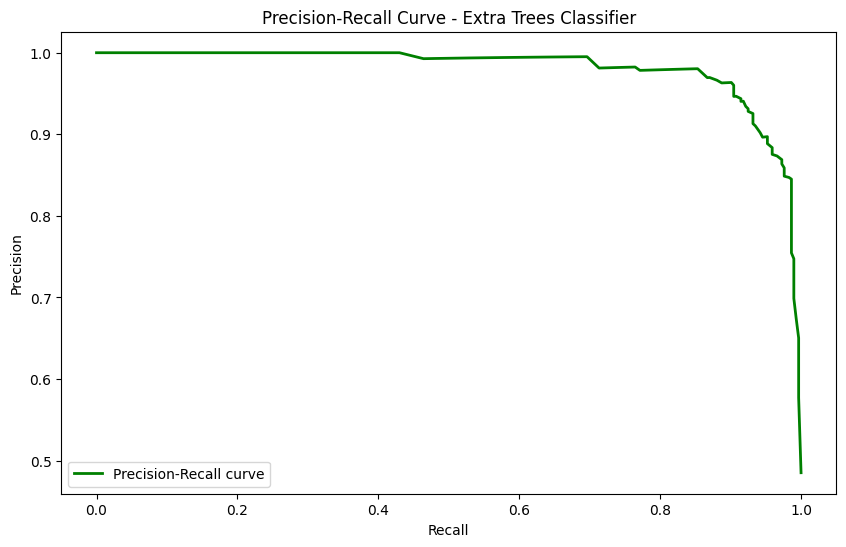

In [40]:
import time
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the Extra Trees Classifier with selected features using k-fold cross-validation
etc = ExtraTreesClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
etc.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_etc = etc.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Extra Trees Classifier
cv_scores_etc = cross_val_score(etc, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_etc = np.mean(cv_scores_etc)

# Print classification report for the Extra Trees Classifier with selected features
print("Extra Trees Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_etc, digits=3))
print("Mean Cross-validation Score (Extra Trees): {:.4f}".format(mean_cv_score_etc))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_etc)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curves
y_prob_etc = etc.predict_proba(X_test_selected)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_etc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Extra Trees Classifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_etc)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Extra Trees Classifier')
plt.legend(loc="lower left")
plt.show()


AdaBoost Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.872     0.897     0.884       311
           1      0.887     0.860     0.873       293

    accuracy                          0.879       604
   macro avg      0.880     0.879     0.879       604
weighted avg      0.879     0.879     0.879       604

Mean Cross-validation Score (AdaBoost): 0.8690
Confusion Matrix:
[[279  32]
 [ 41 252]]
True Positives: 252
True Negatives: 279
False Positives: 32
False Negatives: 41
Training Time: 0.3708 seconds
Testing Time: 0.0241 seconds


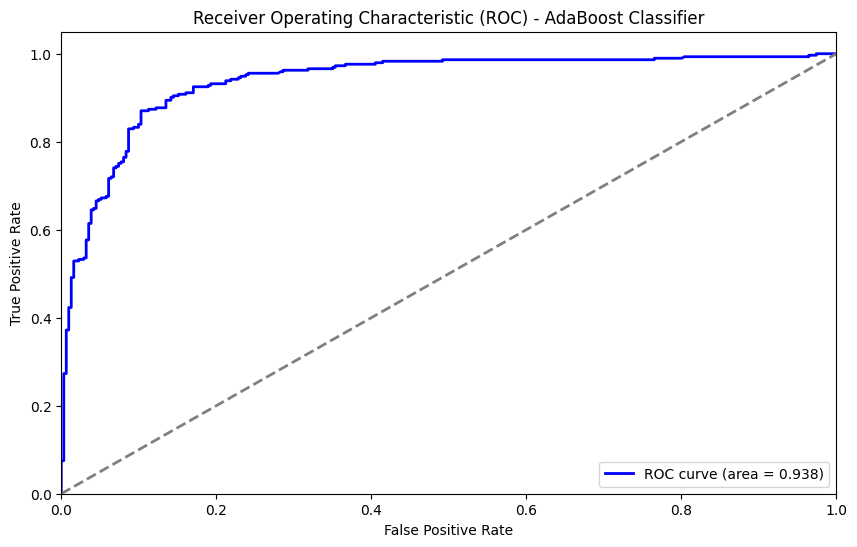

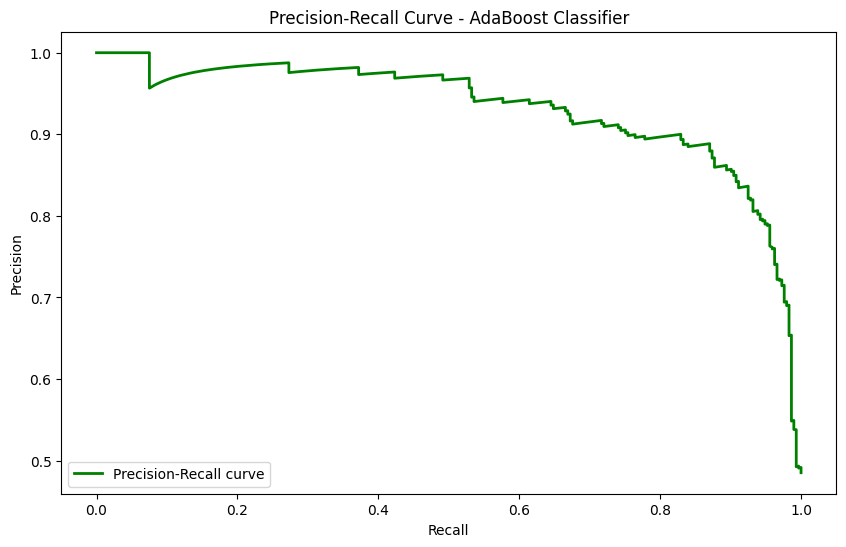

In [41]:
import time
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the AdaBoost Classifier with selected features using k-fold cross-validation
abc = AdaBoostClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
abc.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_abc = abc.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for AdaBoost Classifier
cv_scores_abc = cross_val_score(abc, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_abc = np.mean(cv_scores_abc)

# Print classification report for the AdaBoost Classifier with selected features
print("AdaBoost Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_abc, digits=3))
print("Mean Cross-validation Score (AdaBoost): {:.4f}".format(mean_cv_score_abc))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_abc)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curves
y_prob_abc = abc.predict_proba(X_test_selected)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_abc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_abc)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AdaBoost Classifier')
plt.legend(loc="lower left")
plt.show()


SVM Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.780     0.775     0.777       311
           1      0.763     0.768     0.765       293

    accuracy                          0.772       604
   macro avg      0.771     0.771     0.771       604
weighted avg      0.772     0.772     0.772       604

Mean Cross-validation Score (SVM): 0.7755
Confusion Matrix:
[[241  70]
 [ 68 225]]
True Positives: 225
True Negatives: 241
False Positives: 70
False Negatives: 68
Training Time: 3.3221 seconds
Testing Time: 0.3963 seconds


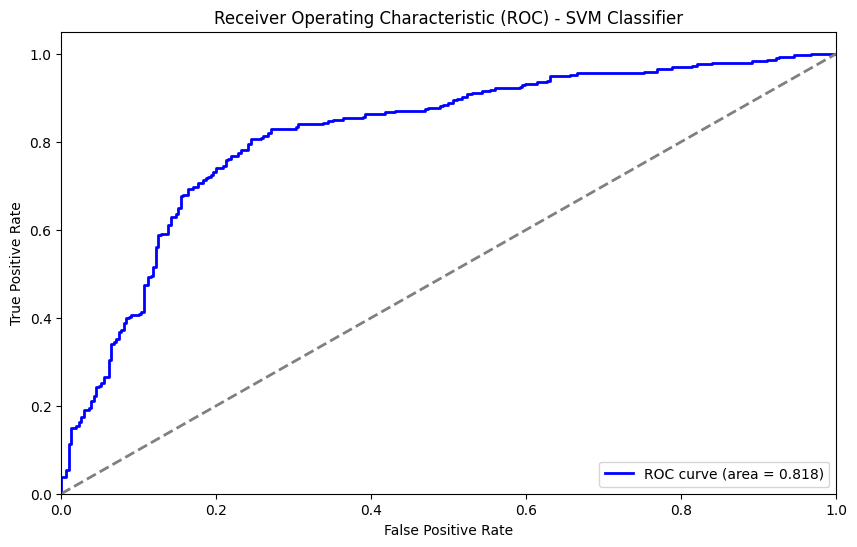

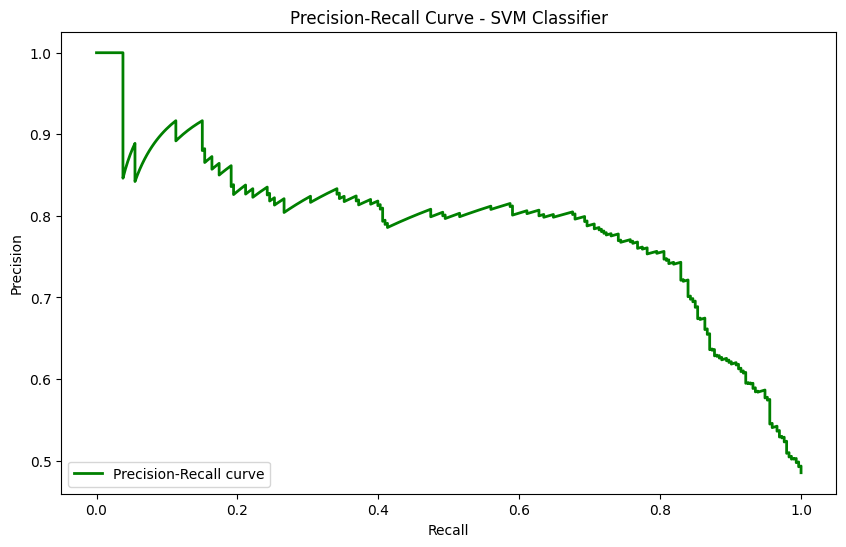

In [42]:
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the SVM Classifier with selected features using k-fold cross-validation
svm = SVC(probability=True, random_state=42)  # Added probability=True for ROC and precision-recall curves

# Record training start time
training_start_time = time.time()
svm.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_svm = svm.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for SVM Classifier
cv_scores_svm = cross_val_score(svm, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_svm = np.mean(cv_scores_svm)

# Print classification report for the SVM Classifier with selected features
print("SVM Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_svm, digits=3))
print("Mean Cross-validation Score (SVM): {:.4f}".format(mean_cv_score_svm))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curves
y_prob_svm = svm.predict_proba(X_test_selected)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM Classifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_svm)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM Classifier')
plt.legend(loc="lower left")
plt.show()


Gradient Boosting Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.891     0.894     0.892       311
           1      0.887     0.884     0.885       293

    accuracy                          0.889       604
   macro avg      0.889     0.889     0.889       604
weighted avg      0.889     0.889     0.889       604

Mean Cross-validation Score (Gradient Boosting): 0.8969
Confusion Matrix:
[[278  33]
 [ 34 259]]
True Positives: 259
True Negatives: 278
False Positives: 33
False Negatives: 34
Training Time: 0.9060 seconds
Testing Time: 0.0055 seconds


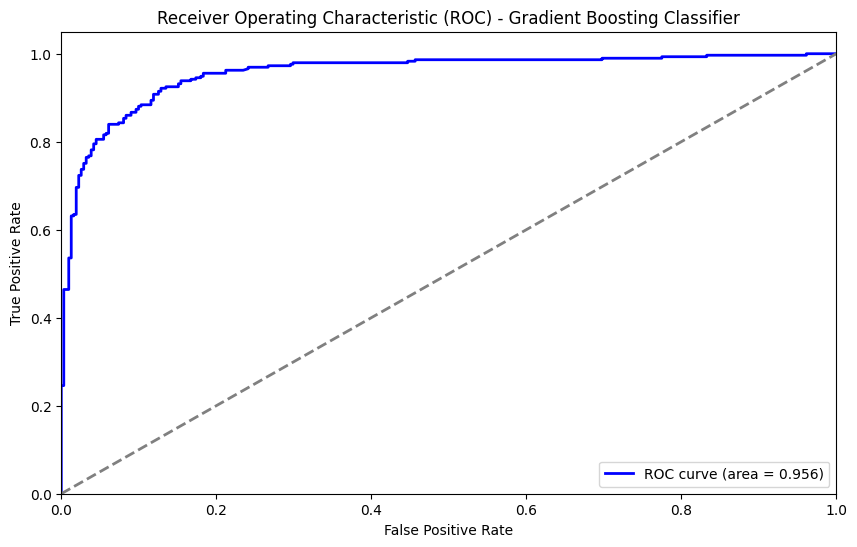

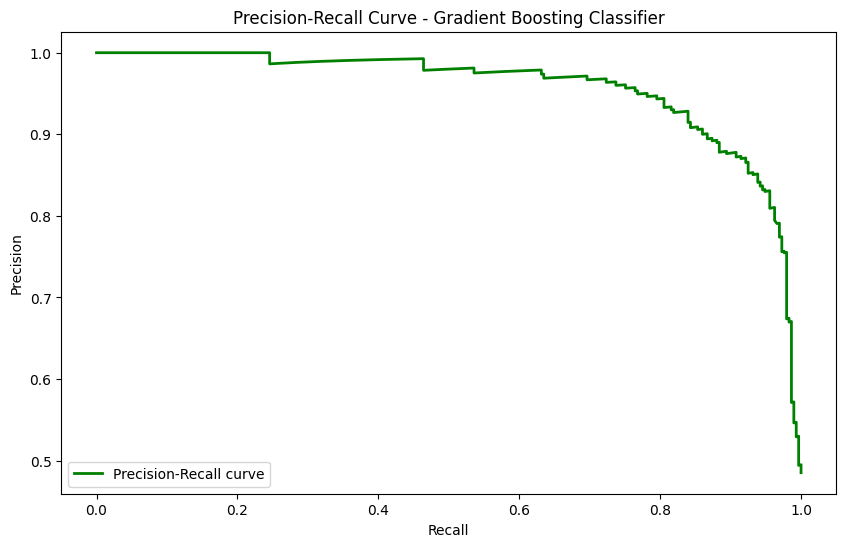

In [43]:
import time
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the Gradient Boosting Classifier with selected features using k-fold cross-validation
gbc = GradientBoostingClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
gbc.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_gbc = gbc.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Gradient Boosting Classifier
cv_scores_gbc = cross_val_score(gbc, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_gbc = np.mean(cv_scores_gbc)

# Print classification report for the Gradient Boosting Classifier with selected features
print("Gradient Boosting Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_gbc, digits=3))
print("Mean Cross-validation Score (Gradient Boosting): {:.4f}".format(mean_cv_score_gbc))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curves
y_prob_gbc = gbc.predict_proba(X_test_selected)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gbc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_gbc)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gradient Boosting Classifier')
plt.legend(loc="lower left")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoostingClassifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.922     0.945     0.933       311
           1      0.940     0.915     0.927       293

    accuracy                          0.930       604
   macro avg      0.931     0.930     0.930       604
weighted avg      0.931     0.930     0.930       604

Mean Cross-validation Score (HistGradientBoosting): 0.9317
Confusion Matrix:
[[294  17]
 [ 25 268]]
True Positives: 268
True Negatives: 294
False Positives: 17
False Negatives: 25
Training Time: 0.7293 seconds
Testing Time: 0.0104 seconds


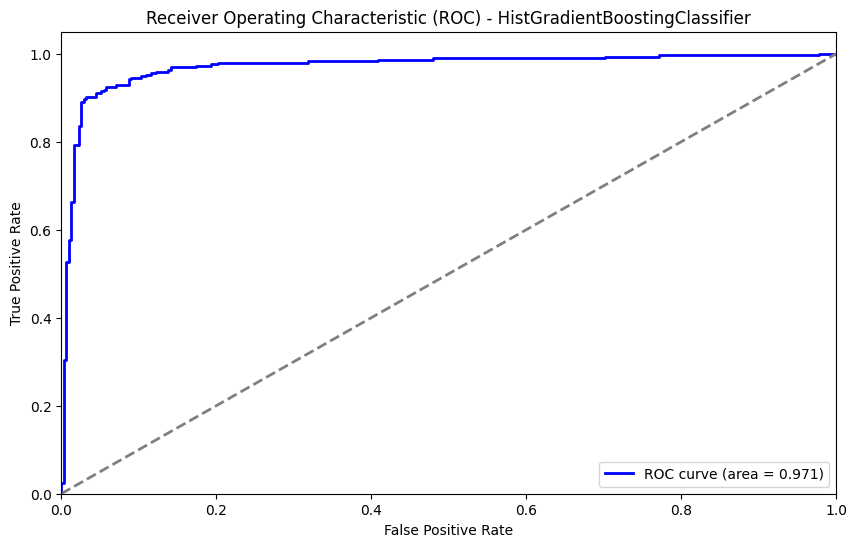

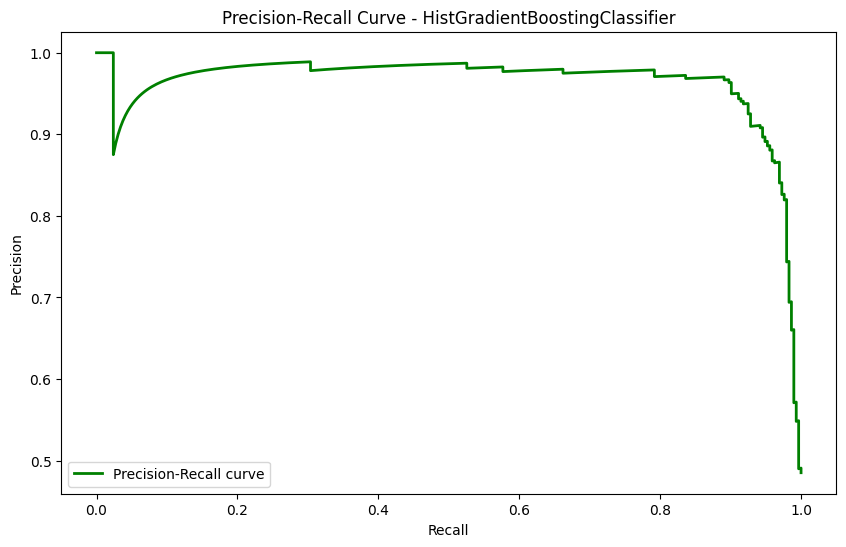

In [44]:
import time
import numpy as np
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the HistGradientBoostingClassifier with selected features using k-fold cross-validation
hgbc = HistGradientBoostingClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
hgbc.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_hgbc = hgbc.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for HistGradientBoostingClassifier
cv_scores_hgbc = cross_val_score(hgbc, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_hgbc = np.mean(cv_scores_hgbc)

# Print classification report for the HistGradientBoostingClassifier with selected features
print("HistGradientBoostingClassifier with Selected Features Report:")
print(classification_report(y_test, y_pred_hgbc, digits=3))
print("Mean Cross-validation Score (HistGradientBoosting): {:.4f}".format(mean_cv_score_hgbc))

# Print confusion matrix
conf_matrix_hgbc = confusion_matrix(y_test, y_pred_hgbc)
print("Confusion Matrix:")
print(conf_matrix_hgbc)

# Extract TP, TN, FP, FN from the confusion matrix
TP_hgbc = conf_matrix_hgbc[1, 1]  # True Positives
TN_hgbc = conf_matrix_hgbc[0, 0]  # True Negatives
FP_hgbc = conf_matrix_hgbc[0, 1]  # False Positives
FN_hgbc = conf_matrix_hgbc[1, 0]  # False Negatives

print("True Positives:", TP_hgbc)
print("True Negatives:", TN_hgbc)
print("False Positives:", FP_hgbc)
print("False Negatives:", FN_hgbc)

# Calculate and print training, testing, and execution time
training_time_hgbc = training_end_time - training_start_time
testing_time_hgbc = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time_hgbc))
print("Testing Time: {:.4f} seconds".format(testing_time_hgbc))

# Compute probabilities for ROC and precision-recall curves
y_prob_hgbc = hgbc.predict_proba(X_test_selected)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_hgbc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - HistGradientBoostingClassifier')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_hgbc)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - HistGradientBoostingClassifier')
plt.legend(loc="lower left")
plt.show()


Quadratic Discriminant Analysis with Selected Features Report:
              precision    recall  f1-score   support

           0      0.863     0.894     0.878       311
           1      0.883     0.850     0.866       293

    accuracy                          0.873       604
   macro avg      0.873     0.872     0.872       604
weighted avg      0.873     0.873     0.872       604

Mean Cross-validation Score (QDA): 0.8701
Confusion Matrix:
[[278  33]
 [ 44 249]]
True Positives: 249
True Negatives: 278
False Positives: 33
False Negatives: 44
Training Time: 0.0165 seconds
Testing Time: 0.0105 seconds


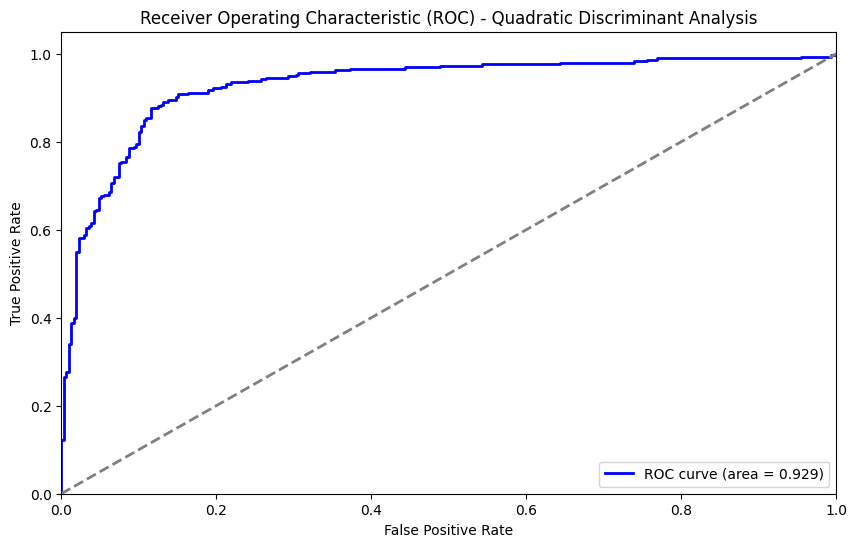

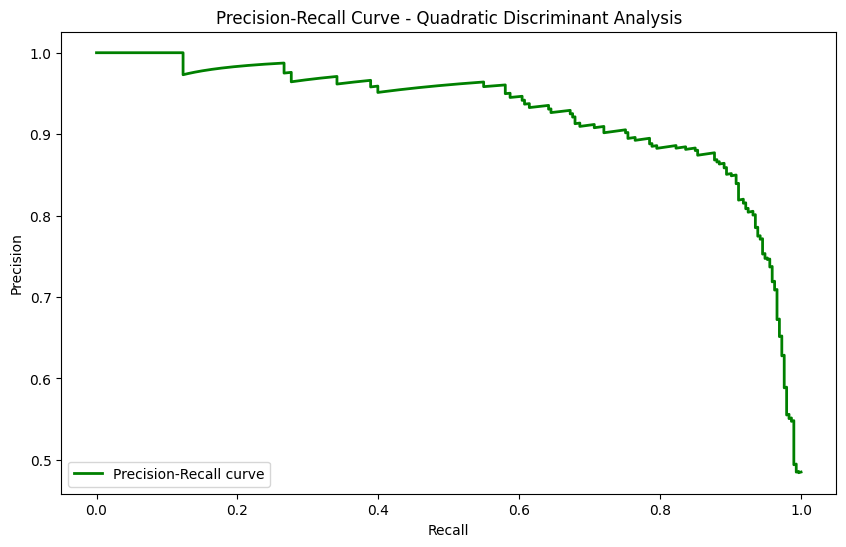

In [45]:
import time
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the Quadratic Discriminant Analysis with selected features using k-fold cross-validation
qda = QuadraticDiscriminantAnalysis()

# Record training start time
training_start_time = time.time()
qda.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_qda = qda.predict(X_test_selected)
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Quadratic Discriminant Analysis
cv_scores_qda = cross_val_score(qda, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_qda = np.mean(cv_scores_qda)

# Print classification report for Quadratic Discriminant Analysis with selected features
print("Quadratic Discriminant Analysis with Selected Features Report:")
print(classification_report(y_test, y_pred_qda, digits=3))
print("Mean Cross-validation Score (QDA): {:.4f}".format(mean_cv_score_qda))

# Print confusion matrix
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
print("Confusion Matrix:")
print(conf_matrix_qda)

# Extract TP, TN, FP, FN from the confusion matrix
TP_qda = conf_matrix_qda[1, 1]  # True Positives
TN_qda = conf_matrix_qda[0, 0]  # True Negatives
FP_qda = conf_matrix_qda[0, 1]  # False Positives
FN_qda = conf_matrix_qda[1, 0]  # False Negatives

print("True Positives:", TP_qda)
print("True Negatives:", TN_qda)
print("False Positives:", FP_qda)
print("False Negatives:", FN_qda)

# Calculate and print training, testing, and execution time
training_time_qda = training_end_time - training_start_time
testing_time_qda = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time_qda))
print("Testing Time: {:.4f} seconds".format(testing_time_qda))

# Compute probabilities for ROC and precision-recall curves
y_prob_qda = qda.predict_proba(X_test_selected)[:, 1]

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_qda)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Quadratic Discriminant Analysis')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob_qda)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Quadratic Discriminant Analysis')
plt.legend(loc="lower left")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression with Selected Features Report:
              precision    recall  f1-score   support

           0      0.878     0.900     0.889       311
           1      0.891     0.867     0.879       293

    accuracy                          0.884       604
   macro avg      0.884     0.884     0.884       604
weighted avg      0.884     0.884     0.884       604

Mean Cross-validation Score (Logistic Regression): 0.8800
Confusion Matrix:
[[280  31]
 [ 39 254]]
True Positives: 254
True Negatives: 280
False Positives: 31
False Negatives: 39
Training Time: 0.1319 seconds
Testing Time: 0.0133 seconds


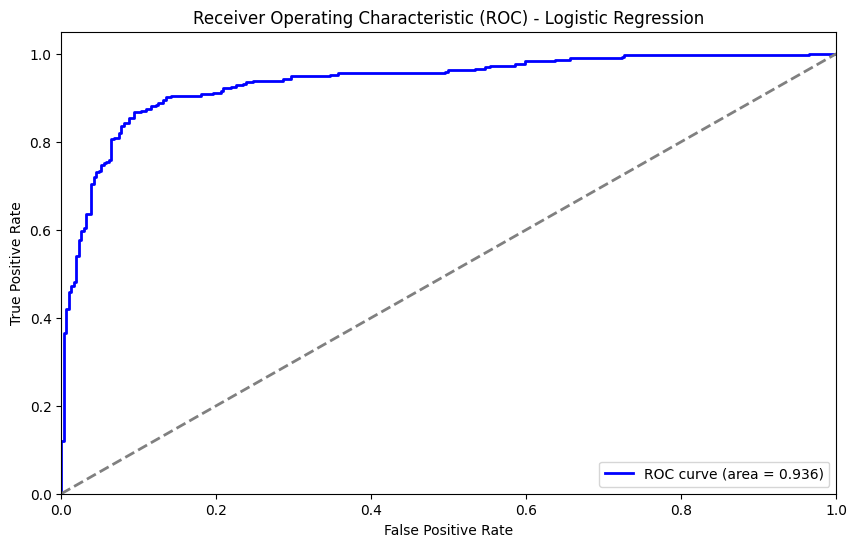

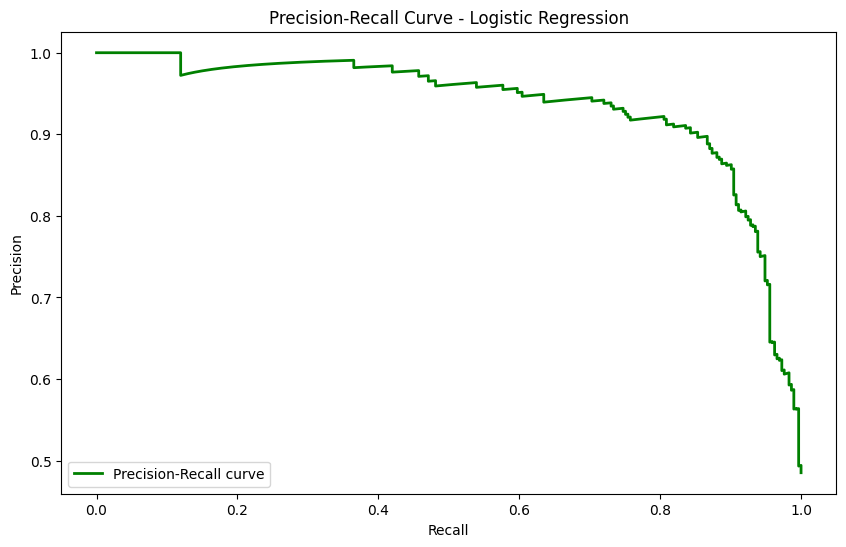

In [46]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the Logistic Regression model with selected features using k-fold cross-validation
lr = LogisticRegression(random_state=42)

# Record training start time
training_start_time = time.time()
lr.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_lr = lr.predict(X_test_selected)
y_prob_lr = lr.predict_proba(X_test_selected)[:, 1]
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(lr, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_lr = np.mean(cv_scores_lr)

# Print classification report for Logistic Regression with selected features
print("Logistic Regression with Selected Features Report:")
print(classification_report(y_test, y_pred_lr, digits=3))
print("Mean Cross-validation Score (Logistic Regression): {:.4f}".format(mean_cv_score_lr))

# Print confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

# Extract TP, TN, FP, FN from the confusion matrix
TP_lr = conf_matrix_lr[1, 1]  # True Positives
TN_lr = conf_matrix_lr[0, 0]  # True Negatives
FP_lr = conf_matrix_lr[0, 1]  # False Positives
FN_lr = conf_matrix_lr[1, 0]  # False Negatives

print("True Positives:", TP_lr)
print("True Negatives:", TN_lr)
print("False Positives:", FP_lr)
print("False Negatives:", FN_lr)

# Calculate and print training, testing, and execution time
training_time_lr = training_end_time - training_start_time
testing_time_lr = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time_lr))
print("Testing Time: {:.4f} seconds".format(testing_time_lr))

# Compute probabilities for ROC and precision-recall curves
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc="lower left")
plt.show()


MLP Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.855     0.907     0.880       311
           1      0.894     0.836     0.864       293

    accuracy                          0.873       604
   macro avg      0.874     0.871     0.872       604
weighted avg      0.874     0.873     0.872       604

Mean Cross-validation Score (MLP): 0.8710
Confusion Matrix:
[[282  29]
 [ 48 245]]
True Positives: 245
True Negatives: 282
False Positives: 29
False Negatives: 48
Training Time: 3.3339 seconds
Testing Time: 0.0065 seconds


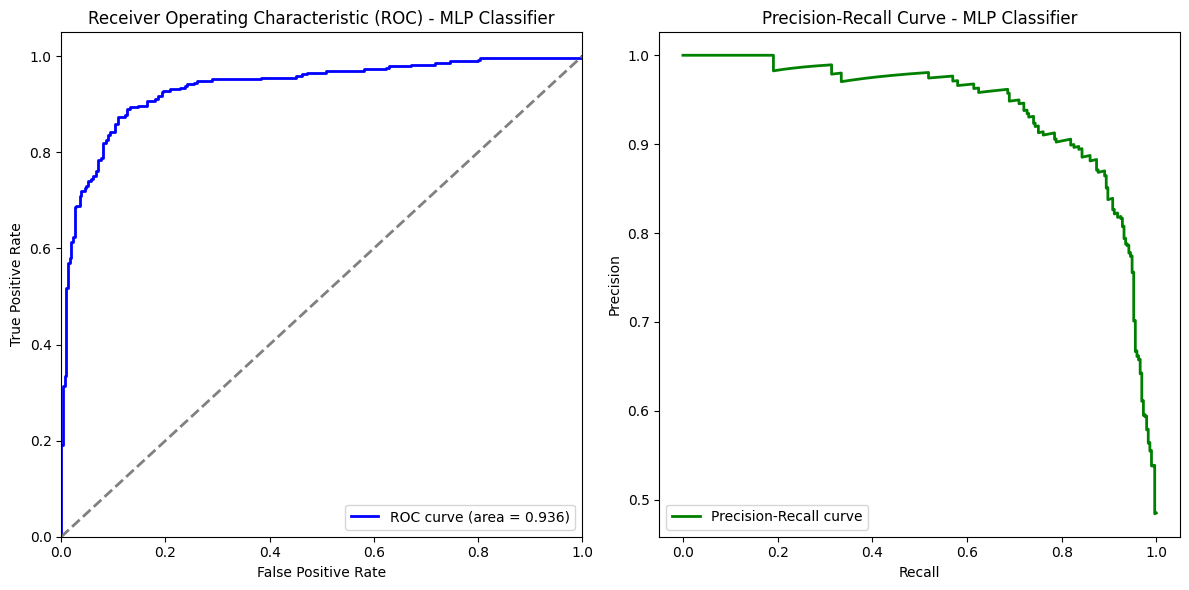

In [47]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Train and evaluate the MLP Classifier with selected features using k-fold cross-validation
mlp = MLPClassifier(random_state=42)

# Record training start time
training_start_time = time.time()
mlp.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_mlp = mlp.predict(X_test_selected)
y_prob_mlp = mlp.predict_proba(X_test_selected)[:, 1]
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for MLP Classifier
cv_scores_mlp = cross_val_score(mlp, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_mlp = np.mean(cv_scores_mlp)

# Print classification report for the MLP Classifier with selected features
print("MLP Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_mlp, digits=3))
print("Mean Cross-validation Score (MLP): {:.4f}".format(mean_cv_score_mlp))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))

# Compute probabilities for ROC and precision-recall curves
fpr, tpr, _ = roc_curve(y_test, y_prob_mlp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - MLP Classifier')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_mlp)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - MLP Classifier')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


Bagging Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.910     0.942     0.926       311
           1      0.936     0.901     0.918       293

    accuracy                          0.922       604
   macro avg      0.923     0.922     0.922       604
weighted avg      0.923     0.922     0.922       604

Mean Cross-validation Score (Bagging): 0.9055
Confusion Matrix:
[[293  18]
 [ 29 264]]
True Positives: 264
True Negatives: 293
False Positives: 18
False Negatives: 29


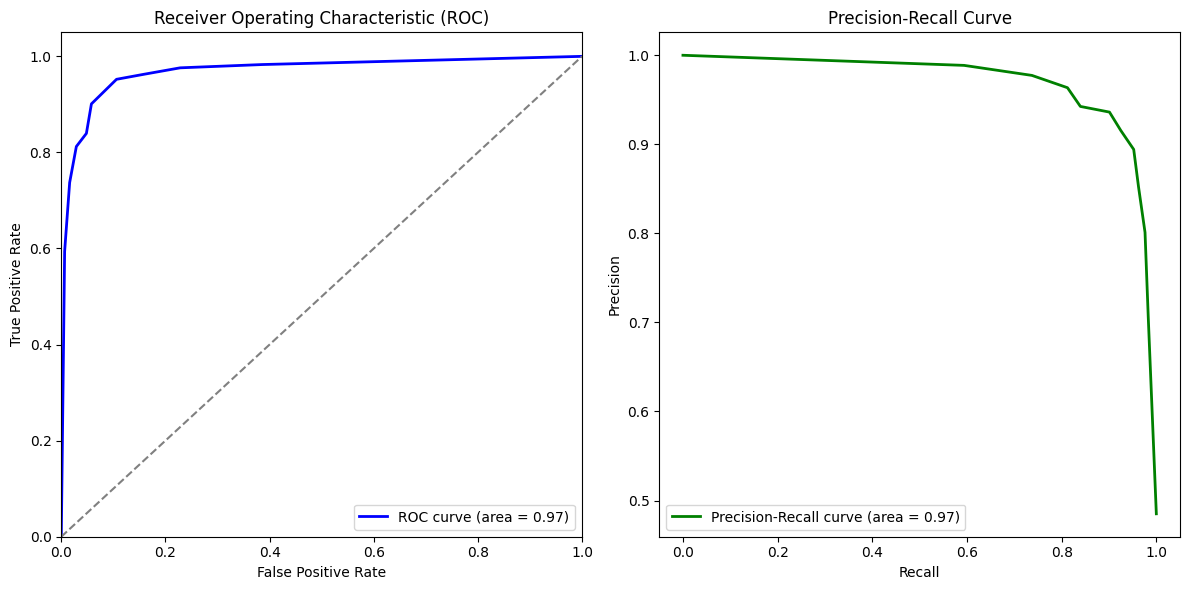

Training Time: 0.2129 seconds
Testing Time: 0.0154 seconds


In [48]:
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Record start time
start_time = time.time()

# Create base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Create Bagging classifier with the base classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Record training start time
training_start_time = time.time()
bagging_classifier.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

X_test_selected = X_test[selected_features]

# Record testing start time
testing_start_time = time.time()
y_pred_bagging = bagging_classifier.predict(X_test_selected)
y_pred_proba_bagging = bagging_classifier.predict_proba(X_test_selected)[:, 1]  # Probability estimates for ROC and PR curves
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for Bagging Classifier
cv_scores_bagging = cross_val_score(bagging_classifier, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_bagging = np.mean(cv_scores_bagging)

# Print classification report for Bagging Classifier with selected features
print("Bagging Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_bagging, digits=3))
print("Mean Cross-validation Score (Bagging): {:.4f}".format(mean_cv_score_bagging))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bagging)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_bagging)
roc_auc = roc_auc_score(y_test, y_pred_proba_bagging)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_bagging)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))


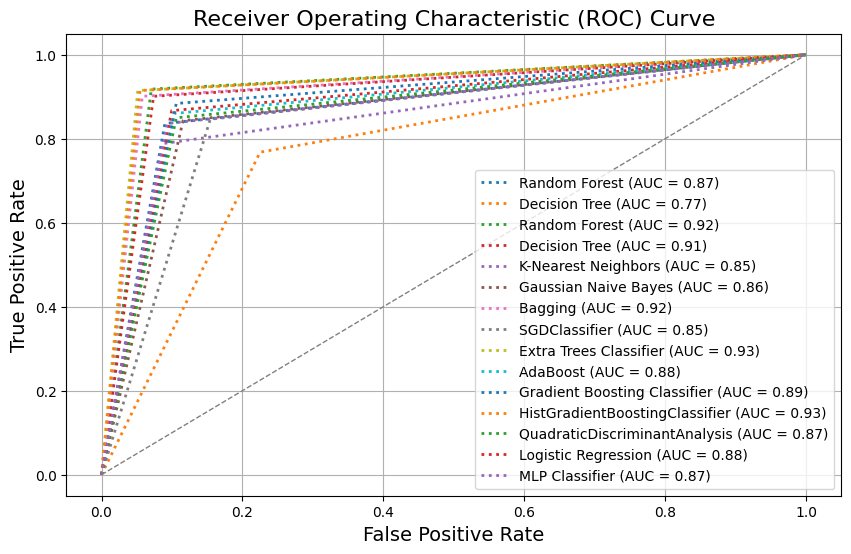

In [49]:
# Compute ROC curve and AUC for each classifier

#Rg
fpr_rg, tpr_rg, _ = roc_curve(y_test, y_pred_ridge)
auc_rg = auc(fpr_rg, tpr_rg)

#SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
auc_svm = auc(fpr_svm, tpr_svm)

#RF
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# DT
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
auc_knn = auc(fpr_knn, tpr_knn)

# Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(fpr_gnb, tpr_gnb)

# Bagging
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_pred_bagging)
auc_bagging = auc(fpr_bagging, tpr_bagging)

# SGDClassifier
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_pred_sgd)
auc_sgd = auc(fpr_sgd, tpr_sgd)

# Extra Trees Classifier
fpr_etc, tpr_etc, _ = roc_curve(y_test, y_pred_etc)
auc_etc = auc(fpr_etc, tpr_etc)

# AdaBoost
fpr_abc, tpr_abc, _ = roc_curve(y_test, y_pred_abc)
auc_abc = auc(fpr_abc, tpr_abc)

# Gradient Boosting Classifier
fpr_gbc, tpr_gbc, _ = roc_curve(y_test,  y_pred_gbc)
auc_gbc = auc(fpr_gbc, tpr_gbc)

# HistGradientBoostingClassifie
fpr_hgbc, tpr_hgbc, _ = roc_curve(y_test,  y_pred_hgbc)
auc_hgbc = auc(fpr_hgbc, tpr_hgbc)

# QuadraticDiscriminantAnalysis
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_pred_qda)
auc_qda = auc(fpr_qda, tpr_qda)

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# MLP Classifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(fpr_rg, tpr_rg, label=f'Random Forest (AUC = {auc_rg:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_svm, tpr_svm, label=f'Decision Tree (AUC = {auc_svm:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes (AUC = {auc_gnb:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_bagging, tpr_bagging, label=f'Bagging (AUC = {auc_bagging:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_sgd, tpr_sgd, label=f'SGDClassifier (AUC = {auc_sgd:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_etc, tpr_etc, label=f'Extra Trees Classifier (AUC = {auc_etc:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_abc, tpr_abc, label=f'AdaBoost (AUC = {auc_abc:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_gbc, tpr_gbc, label=f'Gradient Boosting Classifier (AUC = {auc_gbc:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_hgbc, tpr_hgbc, label=f'HistGradientBoostingClassifier (AUC = {auc_hgbc:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_qda, tpr_qda, label=f'QuadraticDiscriminantAnalysis (AUC = {auc_qda:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', linewidth=2, linestyle=':')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP Classifier (AUC = {auc_mlp:.2f})', linewidth=2, linestyle=':')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()